In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

import glob

# Shanghai World University Rankings


O Academic Ranking of World Universities (ARWU), também conhecido como Shanghai Ranking, foi o primeiro ranking global de univerisidades baseado em um conjunto de indicadores. Foi criado em 2003 plea Shanghai Jiao Tong University. Desde 2009 vem sendo publicado pela Shanghai Ranking Consultancy, uma consultoria focada em educação superior não vinculada a nenhuma universidade ou agência governamental. Informações a repeito desse ranking podem ser encontradas no seguintes links:

- https://en.wikipedia.org/wiki/Academic_Ranking_of_World_Universities
- https://www.shanghairanking.com/about-arwu



Metodologia para o ranking publicado em 2023:

Para a contrução dos rankings são analisados os fatores:

- Quality of Education (peso 10%): medida pelo número de ex-alunos vencedores de prêmios Nobel e Field Medals;
- Quality of Faculty :
    - Medido pelo número de professores e pesquisadores da universidades vencedores de prêmios Nobel e Field Medals (peso 20%);
    - Outro fator é a presença de pesquisadores com grande número de citações (peso 20%).
- Research Output:
    - Quantidade de artigos publicados na Nature e Science (peso 20%);
    - Número de artigos publicados indexados na Science Citation Index-Expanded e Social Science Citation Index in 2022;
- Per Capita Performance:
    - PErformance per capita da instituição. As métrica citadas acima são divididas pleo número total de professores e pesquisadores na instituição.


Informações a respeito da metodologia podem ser encontradas no seguinte link

- https://www.shanghairanking.com/methodology/arwu/2023









## Carregar Dados


In [37]:
#Link para download dos dados: 

'''
2005-2018 - https://www.kaggle.com/datasets/joebeachcapital/shanghai-world-university-ranking
2020 - https://www.kaggle.com/datasets/redouad/shanghai-academic-ranking-of-world-universities
2023 - https://www.kaggle.com/datasets/neellad3110/shanghai-world-university-rankings-2023
'''

path='/home/rodolfo/Insync/rodolfopcruz2@gmail.com/Google Drive/Estudo/Python_Projects/education_data/dados/Shanghai World University Rankings/'

#Duas colunas no dataframe com os rankings de 2005 a 2028 não serão carregadas
cols = list(pd.read_csv(path+'Shanghai_2005-2018/'+'shanghai-world-university-ranking.csv', nrows=1)) #Todas as colunas no dataframe
cols=cols[0].split(';')
#carregar o dataframe com exceção de duas colunas especificadas
df_2005_2018=pd.read_csv(path+'Shanghai_2005-2018/'+'shanghai-world-university-ranking.csv',sep=';',
                         usecols=[i for i in cols if i!='Geo Shape' and i !='Geo Point 2D'])
                         
                         
df_2020     =pd.read_csv(path+'Shanghai_2020/'+'shanghai_2020.csv') 
df_2023     =pd.read_csv(path+'Shanghai_2023/'+'shanghai-ranking_2023.csv')  


## Análise Exploratória

In [38]:
df_2005_2018.head()

,World rank,University,National rank,Total score,Alumni,Award,Hi Ci,N&S,PUB,PCP,Year,World rank integer,Country,ISO2 CODE,ISO3 CODE
0,201-302,University of Bochum,15-24,NaN,0.0,0.0,12.6,11.8,38.9,19.6,2009,201,Germany,DE,DEU
1,303-401,The University of Texas Medical Branch at Galv...,113-138,NaN,0.0,0.0,17.8,8.4,27.8,15.6,2009,303,United States,US,USA
2,151-200,Florida State University,70-89,NaN,0.0,0.0,20.4,18.4,39.5,19.0,2010,151,United States,US,USA
3,201-300,Lancaster University,20-30,NaN,0.0,0.0,17.6,11.9,28.7,19.7,2010,201,United Kingdom,GB,GBR
4,101-150,University of Groningen,3-6,NaN,0.0,19.9,17.6,16.3,46.2,26.7,2010,101,Netherlands,NL,NLD


In [39]:
df_2005_2018.columns

Index(['World rank', 'University', 'National rank', 'Total score', 'Alumni',
       'Award', 'Hi Ci', 'N&S', 'PUB', 'PCP', 'Year', 'World rank integer',
       'Country', 'ISO2 CODE', 'ISO3 CODE'],
      dtype='object')

- Colunas no dataframe para os rankings de 2025 a 2018:
    - Alumni : Relacionado a Quality of Education. Mede a quantiade de ex-alunos que receberam premiações;
    - Award  : Relacionado a Quality of Falculty. Referente a quantidade de profissionais da instituições que receberam premiações;
    - Hi Ci  : Relacionado a Quality of Falculty. Mede o número de pesquisadores com grande número de citações;
    - N&S	 : Relacionado a Research Output. Mede a quantidade de artigos publicado na Nature e Science;
    - PUB    : Relacionado a Research Output. Mede a quantidade de artigos indexados na  Science Citation Index-Expanded e Social Science Citation Index;
    - PCP    : Per Capita Performance.
    

In [40]:
df_2005_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   World rank          7105 non-null   object 
 1   University          7105 non-null   object 
 2   National rank       7105 non-null   object 
 3   Total score         1403 non-null   float64
 4   Alumni              7105 non-null   float64
 5   Award               7105 non-null   float64
 6   Hi Ci               7105 non-null   float64
 7   N&S                 7082 non-null   float64
 8   PUB                 7105 non-null   float64
 9   PCP                 7105 non-null   float64
 10  Year                7105 non-null   int64  
 11  World rank integer  7105 non-null   int64  
 12  Country             7100 non-null   object 
 13  ISO2 CODE           7100 non-null   object 
 14  ISO3 CODE           7100 non-null   object 
dtypes: float64(7), int64(2), object(6)
memory usage: 832.7+

In [41]:
#O ranking de 2020 não inclui os valores de cada fator, somente o score final obtido por cada universidade
df_2020.head()

,world_rank,institution,national_rank,total_score,country_iso_code,country,year
0,1,Harvard University,1,100.0,US,United States,2020
1,2,Stanford University,2,74.2,US,United States,2020
2,3,University of Cambridge,1,70.6,GB,United Kingdom,2020
3,4,Massachusetts Institute of Technology (MIT),3,69.6,US,United States,2020
4,5,"University of California, Berkeley",4,65.8,US,United States,2020


In [42]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   world_rank        1000 non-null   object 
 1   institution       1000 non-null   object 
 2   national_rank     1000 non-null   object 
 3   total_score       100 non-null    float64
 4   country_iso_code  1000 non-null   object 
 5   country           1000 non-null   object 
 6   year              1000 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 54.8+ KB


In [43]:
#No dataframe df_2020 a coluna world_rank é a classificação da ubniversidade, porém o formato dessa coluna está como objeto. Isso porque
# a partir de uma certa posição só é fornecido um intervalo, por exemplo 100-200, significando que a universidade ficou entre as posiçoes
#100 e 200. Será criada uma colunas World rank integer, com a posição de cada universidade no ranking como um inteiro. Para contruçãp dessa
#coluna será usada o ordenamento das universidades no dataframe, uma vez que elas estão ordenadas de acorso com suas posições no ranking.

df_2020['World rank integer']=np.arange(1,len(df_2020)+1)

In [44]:
df_2023.head()

,Rank,Logo,Name,Link,Website,Flag,Country,Region,Foundation_year,Address,Intro,Total_Enrollment,Total_International_Enrollment,UG_Enrollment,International_UG_Enrollment,PG_Enrollment,International_PG_Enrollment,latitude,longitude
0,1,https://www.shanghairanking.com/_uni/logo/032b...,Harvard University,https://www.shanghairanking.com/institution/ha...,http://www.harvard.edu,https://www.shanghairanking.com/_pub/country-f...,United States,North America,1636,"Harvard University, Cambridge, Massachusetts ...",Harvard University is devoted to excellence in...,41987,24.0,14467,10.1,27520,20.1,42.367909,-71.126782
1,2,https://www.shanghairanking.com/_uni/logo/13de...,Stanford University,https://www.shanghairanking.com/institution/st...,http://www.stanford.edu,https://www.shanghairanking.com/_pub/country-f...,United States,North America,1885,450 Serra Mall,Stanford University is a research university t...,16163,24.0,6994,10.7,9169,34.2,37.431314,-122.169365
2,3,https://www.shanghairanking.com/_uni/logo/7916...,Massachusetts Institute of Technology (MIT),https://www.shanghairanking.com/institution/ma...,http://web.mit.edu/,https://www.shanghairanking.com/_pub/country-f...,United States,North America,1861,77 Massachusetts Avenue,The essence of MIT is our appetite for problem...,11084,16.8,4276,14.5,6808,18.2,42.358253,-71.096627
3,4,https://www.shanghairanking.com/_uni/logo/8d98...,University of Cambridge,https://www.shanghairanking.com/institution/un...,http://www.cam.ac.uk,https://www.shanghairanking.com/_pub/country-f...,United Kingdom,Europe,1318,"The Old Schools, Trinity Lane",The University of Cambridge’s mission is to co...,19875,36.9,12265,23.3,7610,58.9,52.210946,0.092005
4,5,https://www.shanghairanking.com/_uni/logo/0ff1...,"University of California, Berkeley",https://www.shanghairanking.com/institution/un...,http://berkeley.edu/,https://www.shanghairanking.com/_pub/country-f...,United States,North America,1868,"University of California, Berkeley, Berkeley,...",Berkeley is internationally noted for its acad...,39874,17.7,29250,19.0,10624,13.9,37.875500,-122.239069


In [45]:
#remover colunas com links do dataframe com o ranking de 2023
colunas_removidas_2023=['Logo','Link','Website','Flag']
df_2023.drop(colunas_removidas_2023,axis=1,inplace=True)
df_2023.head()


,Rank,Name,Country,Region,Foundation_year,Address,Intro,Total_Enrollment,Total_International_Enrollment,UG_Enrollment,International_UG_Enrollment,PG_Enrollment,International_PG_Enrollment,latitude,longitude
0,1,Harvard University,United States,North America,1636,"Harvard University, Cambridge, Massachusetts ...",Harvard University is devoted to excellence in...,41987,24.0,14467,10.1,27520,20.1,42.367909,-71.126782
1,2,Stanford University,United States,North America,1885,450 Serra Mall,Stanford University is a research university t...,16163,24.0,6994,10.7,9169,34.2,37.431314,-122.169365
2,3,Massachusetts Institute of Technology (MIT),United States,North America,1861,77 Massachusetts Avenue,The essence of MIT is our appetite for problem...,11084,16.8,4276,14.5,6808,18.2,42.358253,-71.096627
3,4,University of Cambridge,United Kingdom,Europe,1318,"The Old Schools, Trinity Lane",The University of Cambridge’s mission is to co...,19875,36.9,12265,23.3,7610,58.9,52.210946,0.092005
4,5,"University of California, Berkeley",United States,North America,1868,"University of California, Berkeley, Berkeley,...",Berkeley is internationally noted for its acad...,39874,17.7,29250,19.0,10624,13.9,37.875500,-122.239069


In [46]:
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            1000 non-null   object 
 1   Name                            1000 non-null   object 
 2   Country                         1000 non-null   object 
 3   Region                          1000 non-null   object 
 4   Foundation_year                 1000 non-null   int64  
 5   Address                         862 non-null    object 
 6   Intro                           592 non-null    object 
 7   Total_Enrollment                1000 non-null   int64  
 8   Total_International_Enrollment  1000 non-null   float64
 9   UG_Enrollment                   1000 non-null   int64  
 10  International_UG_Enrollment     1000 non-null   float64
 11  PG_Enrollment                   1000 non-null   int64  
 12  International_PG_Enrollment     100

- Colunas no dataframe do ranking de 2023:

    - Total_Enrollment: total de estudantes matriculados;
    - Total_International_Enrollment: porcentagem dos alunos matriculados que são estrangeiros;
    - UG_Enrollment: Total de alunos de graduação;
    - International_UG_Enrollment: fração de alunos de graduação que são estrangeiros;
    - PG_Enrollment: Número total de alunos de pós graduação;
    - International_PG_Enrollment: fração de alunos da pós graduação que são estrangiros.



In [47]:
#No dataframe df_2023 a coluna world_rank é a classificação da universidade, porém o formato dessa coluna está como objeto. Isso porque
# a partir de uma certa posição só é fornecido um intervalo, por exemplo 100-200, significando que a universidade ficou entre as posiçoes
#100 e 200. Será criada uma colunas World rank integer, com a posição de cada universidade no ranking como um inteiro. Para contruçãp dessa
#coluna será usada o ordenamento das universidades no dataframe, uma vez que elas estão ordenadas de acorso com suas posições no ranking.

df_2023['World rank integer']=np.arange(1,len(df_2023)+1)

In [48]:
#Criação da coluna com o ano do ranking para permitir agrupar os três dataframes com os rakings em um único
df_2023["Year"]=2023

### Padronização do nome das colunas 

In [49]:
#Alteração do nome das colunas para que tenham o mesmo nome em dataframes diferentes
#Os rankings de 2005-2018 serão usados como padrão
df_2005_2018.columns

Index(['World rank', 'University', 'National rank', 'Total score', 'Alumni',
       'Award', 'Hi Ci', 'N&S', 'PUB', 'PCP', 'Year', 'World rank integer',
       'Country', 'ISO2 CODE', 'ISO3 CODE'],
      dtype='object')

In [50]:
df_2020.rename(columns={'world_rank':'World rank','institution':'University','national_rank':'National rank',
                        'country':'Country','year':'Year','total_score':'Total score'},inplace=True)

df_2023.rename(columns={'Rank':'World rank','Name':'University'},inplace=True)

In [51]:
df_2020.columns

Index(['World rank', 'University', 'National rank', 'Total score',
       'country_iso_code', 'Country', 'Year', 'World rank integer'],
      dtype='object')

In [52]:
df_2023.head()

,World rank,University,Country,Region,Foundation_year,Address,Intro,Total_Enrollment,Total_International_Enrollment,UG_Enrollment,International_UG_Enrollment,PG_Enrollment,International_PG_Enrollment,latitude,longitude,World rank integer,Year
0,1,Harvard University,United States,North America,1636,"Harvard University, Cambridge, Massachusetts ...",Harvard University is devoted to excellence in...,41987,24.0,14467,10.1,27520,20.1,42.367909,-71.126782,1,2023
1,2,Stanford University,United States,North America,1885,450 Serra Mall,Stanford University is a research university t...,16163,24.0,6994,10.7,9169,34.2,37.431314,-122.169365,2,2023
2,3,Massachusetts Institute of Technology (MIT),United States,North America,1861,77 Massachusetts Avenue,The essence of MIT is our appetite for problem...,11084,16.8,4276,14.5,6808,18.2,42.358253,-71.096627,3,2023
3,4,University of Cambridge,United Kingdom,Europe,1318,"The Old Schools, Trinity Lane",The University of Cambridge’s mission is to co...,19875,36.9,12265,23.3,7610,58.9,52.210946,0.092005,4,2023
4,5,"University of California, Berkeley",United States,North America,1868,"University of California, Berkeley, Berkeley,...",Berkeley is internationally noted for its acad...,39874,17.7,29250,19.0,10624,13.9,37.875500,-122.239069,5,2023


### Concatenando todos os rankings em um único dataframe

In [53]:
df_rankings=pd.concat([df_2005_2018,df_2020,df_2023],axis=0)

In [54]:
#Em alguns rankings os nomes dos países estão com espaçoes extras

df_rankings['Country']=df_rankings['Country'].str.strip() 
df_rankings['Country']=df_rankings['Country'].str.lstrip() 


## Análise dos Rankings 

### Melhores colocadas ao longo dos anos

In [55]:
def create_top_ranking(dados,n_top,coluna_ano="Year",rank_geral='World rank integer',output='University'):
    '''
    Função que cria um dataframe em que em cada coluna aparecem as n_top primeiras colocadas no ranking de um ano. 
    Os rankings serão criados para os que estiverem disponíveis em dados
    
    dados      - Pandas dataframe com  os rankings. Todos os rankings estão em um unico dataframe. O ano do ranking está especificado
                 em uma coluna
    n_top      - (int) Número de universidades que entrarão nos rankings de cada ano 
    coluna_ano - (str) Nome da coluna onde está especificado o ano do ranking
    rank_geral - (str) Nome da coluna onde estão as posições de cada univrsidade nos rankings
    name_university - (str) Define a informação contida no dataframe que será retornado. Se output='University' no dataframe
                       retornado estarão os nomes das universidades melhores colocadas. Se output='Country' a informação contida
                       será os países de origem das universidades melhreos colocadas
    '''
    top_list=[]
    anos=dados[coluna_ano].unique() #ano do ranking
    anos.sort()
    for ano in anos: #anos é um lista para selecionar o ranking
        top=dados[dados[coluna_ano]==ano].sort_values(by=rank_geral).loc[:,[output]]
        top.rename(columns={output:str(ano)},inplace=True)
        top.reset_index(drop=True,inplace=True)
        top=top.iloc[:n_top,:]
        top_list.append(top)
    top_list=pd.concat(top_list,axis=1) #converter a lista em dataframe
    top_list.index=np.arange(1,n_top+1) #alterar index para que comece em 1

    return top_list


In [56]:
#10 melhores colocadas nos rankings de cada ano
top_10=create_top_ranking(df_rankings,10)
top_10

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2020,2023
1,Harvard University,Harvard University,Harvard University,Harvard University,Harvard University,Harvard University,Harvard University,Harvard University,Harvard University,Harvard University,Harvard University,Harvard University,Harvard University,Harvard University,Harvard University,Harvard University
2,University of Cambridge,University of Cambridge,Stanford University,Stanford University,Stanford University,"University of California, Berkeley",Stanford University,Stanford University,Stanford University,Stanford University,Stanford University,Stanford University,Stanford University,Stanford University,Stanford University,Stanford University
3,Stanford University,Stanford University,"University of California, Berkeley","University of California, Berkeley","University of California, Berkeley",Stanford University,Massachusetts Institute of Technology (MIT),Massachusetts Institute of Technology (MIT),"University of California, Berkeley",Massachusetts Institute of Technology (MIT),Massachusetts Institute of Technology (MIT),"University of California, Berkeley",University of Cambridge,University of Cambridge,University of Cambridge,Massachusetts Institute of Technology (MIT)
4,"University of California, Berkeley","University of California, Berkeley",University of Cambridge,University of Cambridge,University of Cambridge,Massachusetts Institute of Technology (MIT),"University of California, Berkeley","University of California, Berkeley",Massachusetts Institute of Technology (MIT),University of California-Berkeley,"University of California, Berkeley",University of Cambridge,Massachusetts Institute of Technology (MIT),Massachusetts Institute of Technology (MIT),Massachusetts Institute of Technology (MIT),University of Cambridge
5,Massachusetts Institute of Technology (MIT),Massachusetts Institute of Technology (MIT),Massachusetts Institute of Technology (MIT),Massachusetts Institute of Technology (MIT),Massachusetts Institute of Technology (MIT),University of Cambridge,University of Cambridge,University of Cambridge,University of Cambridge,University of Cambridge,University of Cambridge,Massachusetts Institute of Technology (MIT),"University of California, Berkeley","University of California, Berkeley","University of California, Berkeley","University of California, Berkeley"
6,California Institute of Technology,California Institute of Technology,California Institute of Technology,California Institute of Technology,California Institute of Technology,California Institute of Technology,California Institute of Technology,California Institute of Technology,California Institute of Technology,Princeton University,Princeton University,Princeton University,Princeton University,Princeton University,Princeton University,Princeton University
7,Columbia University,Columbia University,Columbia University,Columbia University,Columbia University,Princeton University,Princeton University,Princeton University,Princeton University,California Institute of Technology,California Institute of Technology,University of Oxford,University of Oxford,University of Oxford,Columbia University,University of Oxford
8,Princeton University,Princeton University,Princeton University,Princeton University,Princeton University,Columbia University,Columbia University,Columbia University,Columbia University,Columbia University,Columbia University,California Institute of Technology,Columbia University,Columbia University,California Institute of Technology,Columbia University
9,University of Chicago,University of Chicago,University of Chicago,University of Chicago,University of Chicago,University of Chicago,University of Chicago,University of Chicago,University of Chicago,University of Oxford,University of Chicago,Columbia University,California Institute of Technology,California Institute of Technology,University of Oxford,California Institute of Technology
10,University of Oxford,University of 

### Localização das primeiras colocadas no ranking

##### Top 10

In [57]:
#Localização da 10 universidade melhores colocadas nos rankings de 2011 a 2024
top_10_location=create_top_ranking(df_rankings,10,output='Country')
top_10_location

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2020,2023
1,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States
2,United Kingdom,United Kingdom,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States
3,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United Kingdom,United Kingdom,United Kingdom,United States
4,United States,United States,United Kingdom,United Kingdom,United Kingdom,United States,United States,United States,United States,United States,United States,United Kingdom,United States,United States,United States,United Kingdom
5,United States,United States,United States,United States,United States,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United States,United States,United States,United States,United States
6,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States
7,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United Kingdom,United Kingdom,United Kingdom,United States,United Kingdom
8,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States
9,United States,United States,United States,United States,United States,United States,United States,United States,United States,United Kingdom,United States,United States,United States,United States,United Kingdom,United States
10,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United States,United Kingdom,United States,United States,United States,United States,United States


In [58]:
#Número de vezes que cada país apareceu nas dez primeiras posições dos rankings 
#Somente universidades americanas e do Reino Unido no top 10 de todos os rankings
paises_aparicoes_top_10=top_10_location.apply(pd.Series.value_counts)
paises_aparicoes_top_10

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2020,2023
United States,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
United Kingdom,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


##### Top 100

In [59]:
#Pais de origem das 100 melhores universidade nos rankings de 2011 a 2024
top_100_location=create_top_ranking(df_rankings,100,output='Country')
top_100_location

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2020,2023
1,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States
2,United Kingdom,United Kingdom,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States
3,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United Kingdom,United Kingdom,United Kingdom,United States
4,United States,United States,United Kingdom,United Kingdom,United Kingdom,United States,United States,United States,United States,United States,United States,United Kingdom,United States,United States,United States,United Kingdom
5,United States,United States,United States,United States,United States,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United States,United States,United States,United States,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Sweden,France,United States,Germany,Australia,United States,Australia,United States,Netherlands,Belgium,Canada,United States,Switzerland,United States,United States,China
97,Italy,United States,Sweden,Germany,Denmark,United States,United States,Japan,Australia,United States,Germany,United States,Australia,Singapore,Belgium,United States
98,United Kingdom,Japan,United States,Sweden,Germany,Denmark,United Kingdom,Australia,France,Switzerland,Netherlands,Japan,United States,Switzerland,Canada,United States
99,Sweden,France,France,Australia,United States,United States,Japan,United States,United States,United States,United States,Australia,United States,Germany,France,Canada


In [60]:
paises_aparicoes_top_100=top_100_location.apply(pd.Series.value_counts)
paises_aparicoes_top_100.fillna(value=0,inplace=True)
paises_aparicoes_top_100.sort_values(by='2023',ascending=False)


,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2020,2023
United States,53.0,53.0,54.0,54.0,55.0,54.0,53.0,53.0,52.0,52.0,51.0,50.0,48.0,46.0,41.0,38.0
China,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,3.0,6.0,10.0
United Kingdom,11.0,11.0,11.0,11.0,11.0,11.0,10.0,9.0,9.0,8.0,9.0,8.0,9.0,8.0,8.0,8.0
Australia,2.0,2.0,2.0,3.0,3.0,3.0,4.0,5.0,5.0,4.0,4.0,6.0,6.0,6.0,7.0,6.0
Switzerland,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,5.0,4.0,4.0,5.0,5.0,5.0,5.0
Canada,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0
France,4.0,4.0,4.0,3.0,3.0,3.0,3.0,2.0,3.0,4.0,4.0,2.0,2.0,3.0,5.0,4.0
Germany,5.0,5.0,6.0,6.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0
Sweden,4.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
Israel,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,2.0,2.0,2.0,1.0,2.0,1.0,3.0


### Análise dos Fatores Considerados para Construção dos Rankings

- A pontução para cada fator usado na construção dos rankings estão disponíveis para os anos de 2005 a 2018.

In [61]:
df_2005_2018.columns

Index(['World rank', 'University', 'National rank', 'Total score', 'Alumni',
       'Award', 'Hi Ci', 'N&S', 'PUB', 'PCP', 'Year', 'World rank integer',
       'Country', 'ISO2 CODE', 'ISO3 CODE'],
      dtype='object')

In [62]:
df_2005_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   World rank          7105 non-null   object 
 1   University          7105 non-null   object 
 2   National rank       7105 non-null   object 
 3   Total score         1403 non-null   float64
 4   Alumni              7105 non-null   float64
 5   Award               7105 non-null   float64
 6   Hi Ci               7105 non-null   float64
 7   N&S                 7082 non-null   float64
 8   PUB                 7105 non-null   float64
 9   PCP                 7105 non-null   float64
 10  Year                7105 non-null   int64  
 11  World rank integer  7105 non-null   int64  
 12  Country             7100 non-null   object 
 13  ISO2 CODE           7100 non-null   object 
 14  ISO3 CODE           7100 non-null   object 
dtypes: float64(7), int64(2), object(6)
memory usage: 832.7+

#### Correlação

Correlação entre 7 fatores:

- Total score 
- Alumni
- Award 
- Hi Ci 
- N&S	
- PUB   
- PCP


In [63]:
#ranking para o ano de 2018 -  ranking mais recente para o qual os dados dos indicadores estão disponíveis
df_2018=df_2005_2018.loc[df_2005_2018['Year']==2018,:]

In [64]:
#fatores que serão analisados através da correlação 
fatores_analisados=['Total score','Alumni','Award','Hi Ci','N&S','PUB','PCP']

In [65]:
#Calcular a correlação entre os fatores considerados
correlation=df_2018.loc[:,fatores_analisados].corr()

Análise da correlação linear da pontuação geral:

- Existe uma correlação positiva muito forte com a quantidade de artigos publicados na Nature e na Science (N&S) e com a quantide de professores que já receberam premiações (Awards).Esses dois fatores estão relacionados a qualidade dos professores e dos pesquisadores da intituição e a qualidde da pesquisa produzida respectivamente;
- Existe uma correlação positiva forte com Alumini e com HI CI. O primeiro fator está relacionado a qualidade da esducação e o segundo a qualidade dos pesquisadores trabalhando na instituição;
- Existe uma correlação positiva moderada com PUB e PCP. O primeiro fator está relacionado a qualidade da pesquisa produzida e a segunda a produtividade da instituição.

Alguns pontos interessantes verificados no cálculo da correlação linear:

- A qualidade da educação tem maior correlação com a qualidade dos professores e pesquisadores da instituição medida pela quantidade de premiações (fator Award);
- O indicador Award tem correlação positiva forte com a quantidade de artigos publicados na Science e na Nature, mas correlação positiva muito fraca com PUB. Provavelmene os pesquisadores premiados direcionem a publicações de seus trabalhos na grande maioria para a revistas Science e NAture;
- HI CI tem correlação positiva forte com N&S. Artigos na melhores revistas tendem a receber grande quantidade de citações.


<Axes: >

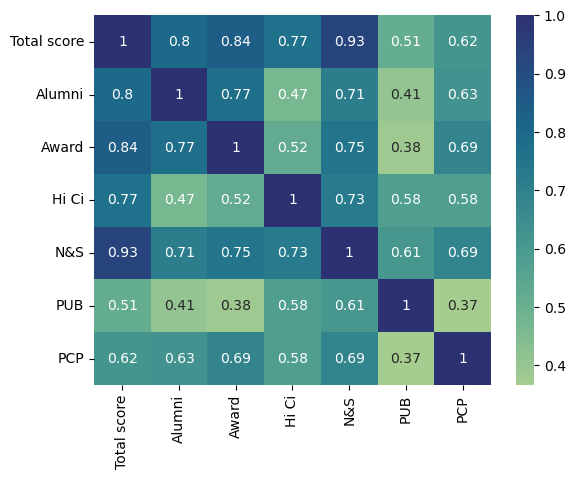

In [66]:
#plotar correlação entre os  fatores considerados usando seaborn
import matplotlib.pyplot as plt
sns.heatmap(correlation, annot=True,cmap="crest")


In [67]:
##plotar correlação entre os seis fatores considerados usando plotly
fig = px.imshow(correlation,text_auto=True,color_continuous_scale='RdBu_r')
fig.show()

### Construção de rankings baseados em outros fatores

Função para criação de ranking de acordo com um dos seguintes indicadores:
 
 - Alumni
 - Award
 - Hi Ci
 - N&S
 - PUB   
 - PCP

*O valor desses fatores so está disponível para os rankings entre 2005 e 2018

In [68]:
df_2005_2018.columns

Index(['World rank', 'University', 'National rank', 'Total score', 'Alumni',
       'Award', 'Hi Ci', 'N&S', 'PUB', 'PCP', 'Year', 'World rank integer',
       'Country', 'ISO2 CODE', 'ISO3 CODE'],
      dtype='object')

In [73]:
def ranking_fator_selecinado(dados,ano,fator,n_posicoes,overall_ranking='World rank integer',
                             coluna_ano='Year',name_universities='University',location='Country'):
    '''
    Função para gerar uma ranking para o fator desejado

    Inputs:
        dados             - Pandas dataframe com os rankings para os anos entre 2005 e 2018
        ano               - (int) ano selecionado para o qual o ranking será criado. Deve ser um ano no intervalo [2005,2018].
        fator             - (str) nome do fator considerado na contrucao do ranking. Fatores aceitos são: 'Alumni',
                                  'Award','Hi Ci','N&S','PUB' e 'PCP'
        n_posicoes        - (int) número de posições no ranking gerado. Serão incluídas desde a posição 1 até n_posicões
        overall_ranking   - (str) nome da coluna do dataframe dados que contem a posição das universidade no ranking geral
        name_universities - (str) nome da coluna do dataframe dados que contem o nome das universidade
        location          - (str) nome da coluna no dataframe com os paises de origem das universidades
        coluna_ano        - (str) nome da coluna com o ano do ranking
        
    Output:
        Pandas coluna com três colunas: uma delas com as universidades ordenadas de acordo com o fator selecionado, uma com a 
        posição da universidade no ranking geral e outra com os paises de origem das universidades
    '''
    if ano not in np.arange(2005,2019,1):
        raise Exception('Os rankings estão disponíveis para os anos de 2005 a 2018')

    if fator not in ['Alumni','Award','Hi Ci','N&S','PUB','PCP']:
        raise Exception('Fator selecionador deve ser um dos seguintes: Alumni, Award, Hi Ci , N&S , PUB , PCP')
    dados=dados.loc[dados[coluna_ano]==ano,:] #selecionar o ano
    dados_ordenados=dados.sort_values(by=fator,ascending=False).reset_index(drop=True) #ordenar os valores de acordo com o fator selecionado
    dados_ordenados=dados_ordenados.loc[:(n_posicoes-1),[overall_ranking,name_universities,location]] 
    dados_ordenados.rename(columns={overall_ranking:'Ranking Geral',location:'Location',name_universities:'Top '+str(n_posicoes)+' '+fator},inplace=True)
    dados_ordenados.index=np.arange(1,n_posicoes+1) #index começando em zero
    return dados_ordenados

In [72]:
#Exemplo: 20 mlehores universidades de acordo com o critério pesquisa e suas posições no ranking geral
ranking_2018_award=ranking_fator_selecinado(df_2005_2018,2018,'Award',20)
ranking_2018_award

,Ranking Geral,Top 20 Award,Location
1,1,Harvard University,United States
2,6,Princeton University,United States
3,3,University of Cambridge,United Kingdom
4,10,University of Chicago,United States
5,2,Stanford University,United States
6,4,Massachusetts Institute of Technology (MIT),United States
7,5,"University of California, Berkeley",United States
8,9,California Institute of Technology,United States
9,8,Columbia University,United States
10,30,Rockefeller University,United States


Função para criação de um dataframe com universidades em cada coluna rankeadas de acordo com os seguintes fatores:

 - Overall
 - Alumni
 - Award
 - Hi Ci
 - N&S
 - PUB   
 - PCP

In [104]:
def ranking_sete_fatores(dados,ano,n_posicoes,fatores,coluna_names='University',coluna_ano='Year'):
    """
    Função para crição de um dataframe com 6 colunas, em cala uma delas as universidade aparecem rankeadas de acordo com um dos 6 fatores:
        - Overall
        - Alumni
        - Award
        - Hi Ci
        - N&S
        - PUB   
        - PCP

    Inputs:
        dados        - Pandas dataframe com os rankings para todos os anos entre 2005 e 2018
        ano          - (int) Ano em que o dataframe foi publicado.Deve ser um valor entre 2005 e 2018
        n_posicoes   - (int) Número de posições que aparecerão no ranking
        fatores      - (list) Lista com o nome dos fatores (strings) que serão usados na construção dos rankings
        coluna_names - (str) Nome da coluna com o nome das universidades
        coluna_ano   - (str) Nome da coluna onde estão os anos em que os rankings foram publicados

    Outpout:
        Pandas dataframe com 7 colunas,são elas:
            - Ranking Geral	
            - Ranking Alumni
            - Ranking Award
            - Ranking Hi Ci
            - Ranking N&S
            - Ranking PUB   
            - Ranking PCP
        Na coluna Ranking Geral as universidades aparecem ordenadas (começãndo pela melhor) de acordo com a pontuação geral obtida 
        no ranking e nas demais rankeadas de acordo com um fator especifico.
    """
    #nome das colunas do dataframe original que serão usadas para criação dos rankings
    dados_ano_selecionado=dados.loc[dados[coluna_ano]==ano,:] #seleção dos dados para o ano especificado

    if ano not in np.arange(2005,2019,1):
        raise Exception('Os rankings estão disponíveis para os anos de 2005 a 2018')
    
    ranking_fatores=[]
    for num,factor in enumerate(fatores):
        if num==0:
            #o primeiro fator é o ranking geral, ele deve ser ordenado do menor para o maior (do primeiro lugar ao último)
            dados_fator=dados_ano_selecionado.sort_values(by=factor,ascending=True).reset_index(drop=True) #selecionar ano desejado
            dados_fator=dados_fator.loc[:n_posicoes-1,[coluna_names]] #selecionar o número de posições desejadas
            dados_fator.rename(columns={coluna_names:'Ranking '+'Geral'},inplace=True) #alterar o nome da coluna. Não segue o padrão das
                                                                                #demais em que é só adicionar Ranking ao nome do fator 
        else:
            #nos fatores a ordenação deve ser do maior para o menor (nos fatores os valores são para as pontuações, nas as posições no ranking)
            dados_fator=dados_ano_selecionado.sort_values(by=factor,ascending=False).reset_index(drop=True)
            dados_fator=dados_fator.loc[:n_posicoes-1,[coluna_names]]
            dados_fator.rename(columns={coluna_names:'Ranking '+fatores[num]},inplace=True)
        ranking_fatores.append(dados_fator)
    ranking_fatores=pd.concat(ranking_fatores,axis=1)
    ranking_fatores.index=np.arange(1,n_posicoes+1)
    
    return ranking_fatores


In [105]:
#Exemplo: Top 20 para o ano de 2018
fatores=['World rank integer','Alumni','Award','Hi Ci','N&S','PUB','PCP']


top_20_2018=ranking_sete_fatores(df_2005_2018,2018,20,fatores)
top_20_2018

,Ranking Geral,Ranking Alumni,Ranking Award,Ranking Hi Ci,Ranking N&S,Ranking PUB,Ranking PCP
1,Harvard University,Harvard University,Harvard University,Harvard University,Harvard University,Harvard University,California Institute of Technology
2,Stanford University,University of Cambridge,Princeton University,Stanford University,Stanford University,University of Toronto,Ecole Normale Superieure - Paris
3,University of Cambridge,Massachusetts Institute of Technology (MIT),University of Cambridge,University of Oxford,Massachusetts Institute of Technology (MIT),University of Michigan-Ann Arbor,Harvard University
4,Massachusetts Institute of Technology (MIT),"University of California, Berkeley",University of Chicago,"University of California, Berkeley","University of California, Berkeley",Shanghai Jiao Tong University,Princeton University
5,"University of California, Berkeley",Columbia University,Stanford University,University of Cambridge,California Institute of Technology,University College London,Massachusetts Institute of Technology (MIT)
6,Princeton University,University of Chicago,Massachusetts Institute of Technology (MIT),Duke University,University of Cambridge,University of Oxford,University of Cambridge
7,University of Oxford,Princeton University,"University of California, Berkeley","University of California, Los Angeles",Columbia University,Stanford University,"University of California, Berkeley"
8,Columbia University,California Institute of Technology,California Institute of Technology,Washington University in St. Louis,Yale University,University of Sao Paulo,Stanford University
9,California Institute of Technology,University of Oxford,Columbia University,University of Washington,"University of California, San Diego",University of Washington,The University of Texas M. D. Anderson Cancer ...
10,University of Chicago,Ecole Normale Superieure - Paris,Rockefeller University,"University of California, San Diego",University of Oxford,Johns Hopkins University,Karolinska Institute


### Number of Students


In [106]:
df_2023.columns

Index(['World rank', 'University', 'Country', 'Region', 'Foundation_year',
       'Address', 'Intro', 'Total_Enrollment',
       'Total_International_Enrollment', 'UG_Enrollment',
       'International_UG_Enrollment', 'PG_Enrollment',
       'International_PG_Enrollment', 'latitude', 'longitude',
       'World rank integer', 'Year'],
      dtype='object')

In [180]:
#Universidade que entraram no top 10 que tem o maior número de alunos
ano='2024'
df_dados.loc[ano,['rank','name','location','stats_number_students']].sort_values(by='stats_number_students',ascending=False).head(20)

,rank,name,location,stats_number_students
1004,1001+,Anadolu University,Turkey,1824383.0
828,801–1000,Cairo University,Egypt,252095.0
964,801–1000,University of South Africa,South Africa,184432.0
1041,1001+,Instituto Politécnico Nacional (IPN),Mexico,173868.0
807,801–1000,Alexandria University,Egypt,166350.0
721,601–800,National Autonomous University of Mexico,Mexico,145024.0
804,801–1000,Ain Shams University,Egypt,131200.0
1036,1001+,University of Guadalajara,Mexico,118665.0
336,301–350,Sapienza University of Rome,Italy,111453.0
902,801–1000,Mansoura University,Egypt,109714.0


Comentários para o ranking de 2024:

- Dentre as 20 maiores universidades em número de alunos, 17 delas estão em países de 3° mundo;
- A maior universidade européia está na Itália;
- A USP é a maior universidade da América do Sul, equanto o México tem a maior universidade do continente;
- Os EStados Unidos tem 157 universidades no ranking, mas nenhuma dentre as 20 com maior número de alunos.


In [181]:
#Numero de alunos nas universidade melhores colocadas
df_dados.loc[ano,['rank','name','location','stats_number_students']].head(10)

,rank,name,location,stats_number_students
0,1,University of Oxford,United Kingdom,20410.0
1,2,University of Cambridge,United Kingdom,18390.0
2,=3,California Institute of Technology,United States,2209.0
3,=3,Stanford University,United States,15845.0
4,5,Massachusetts Institute of Technology,United States,11177.0
5,6,Harvard University,United States,20326.0
6,7,Princeton University,United States,7955.0
7,8,Imperial College London,United Kingdom,15855.0
8,9,The University of Chicago,United States,13525.0
9,=10,ETH Zurich,Switzerland,19233.0


### Student Staff Ratio

In [182]:
ano='2024'
df_dados.loc[ano,['rank','name','location','stats_student_staff_ratio']].sort_values(by='stats_student_staff_ratio').head(20)

,rank,name,location,stats_student_staff_ratio
886,801–1000,The Jikei University School of Medicine,Japan,0.6
281,251–300,Oregon Health and Science University,United States,1.0
890,801–1000,Kansai Medical University,Japan,1.1
947,801–1000,Saitama Medical University,Japan,1.5
335,301–350,Rush University,United States,2.1
454,401–500,University of Nebraska Medical Center,United States,2.4
959,801–1000,Showa University,Japan,2.4
275,251–300,Medical University of Vienna,Austria,2.7
954,801–1000,Shiga University of Medical Science,Japan,3.0
530,501–600,Fujita Health University,Japan,3.1


Comentários para o ranking de 2024:

- Dentre as 20 universidade com menores porporções entre alunos e funcionários, 11 delas estão no Japão;
- A Jikei University School of Medicine	tem mais funcionários que alunos;
- A maior parte das universidade com elevadas proporções de funcionários em relação a alunos são da área de saúde.

## Universidades Brasileiras

In [183]:
df_universidades_brasileiras=df_dados[df_dados['location']=="Brazil"] #dataframe somente com as universidades brasileiras
df_universidades_brasileiras

rank_order     rank                                name  \
2011 221          201  201-225             University of São Paulo   
     325          301  301-350              University of Campinas   
2012 280         2810  251–300             University of São Paulo   
     410         4110  401–500              University of Campinas   
     652         6530  601–800  Federal University of Minas Gerais   
...               ...      ...                                 ...   
2024 1027       10280    1001+   Federal University of Santa Maria   
     1028       10290    1001+        Federal University of Viçosa   
     1029       10300    1001+       Fluminense Federal University   
     1055       10560    1001+           Londrina State University   
     1092       10930    1001+                 Unisinos University   

          scores_overall  scores_overall_rank  scores_teaching  \
2011 221               -                  358             51.6   
     325               -                  281             43.4   
2012 280       46.4–49.4                 2810             55.9   
     410       37.1–41.6                 4110             46.8   
     652       26.0–33.4                 6530             29.3   
...                  ...                  ...              ...   
2024 1027       9.2–15.5                10280             22.3   
     1028       9.2–15.5                10290             25.8   
     1029       9.2–15.5                10300             17.8   
     1055       9.2–15.5                10560             23.8   
     1092       9.2–15.5                10930             23.0   

           scores_teaching_rank scores_international_outlook  \
2011 221                     68                         25.3   
     325                    112                         20.7   
2012 280                     81                         32.7   
     410                    128                         28.6   
     652                    457                         25.4   
...                         ...                          ...   
2024 1027                   688                         15.8   
     1028                   506                         19.1   
     1029                   970                         24.1   
     1055                   604                         16.3   
     1092                   653                         17.9   

           scores_international_outlook_rank scores_industry_income  ...  \
2011 221                                 385                   40.1  ...   
     325                                 395                   44.5  ...   
2012 280                                 838                   39.5  ...   
     410                                 915                   44.6  ...   
     652                                 981                   38.3  ...   
...                                      ...                    ...  ...   
2024 1027                               1066                   33.3  ...   
     1028                                993                   50.3  ...   
     1029                                874                   32.0  ...   
     1055                               1054                   31.8  ...   
     1092                               1026                   33.2  ...   

                                            subjects_offered  closed  \
2011 221   Electrical & Electronic Engineering,Politics &...   False   
     325   Architecture,Mechanical & Aerospace Engineerin...   False   
2012 280   Electrical & Electronic Engineering,Politics &...   False   
     410   Architecture,Mechanical & Aerospace Engineerin...   False   
     652   Communication & Media Studies,Architecture,Gen...   False   
...                                                      ...     ...   
2024 1027  Medicine & Dentistry,Law,Geology, Environmenta...   False   
     1028  Geography,Civil Engineering,Biological Science...   False   
     1029  Languages, Literature & Linguistics,

### Número de universidades brasileiras nos rankings de cada ano

In [184]:
#Número de universidades brasileiras que entraram no ranking
#Dataframe com o número total de universidades no ranking de cada ano e quantas dessas são brasileiras
num_brasileiras={'Ano':[],
                'Total Universidades':[],
                'Universidades Brasileiras':[]}
for ano in anos:
    num_brasileiras['Ano']+=[ano]
    num_brasileiras['Total Universidades']+=[len(df_dados.loc[ano])]
    try:
        num_brasileiras['Universidades Brasileiras']+=[len(df_universidades_brasileiras.loc[ano])]
    except:
        num_brasileiras['Universidades Brasileiras']+=[0]

num_brasileiras=pd.DataFrame.from_dict(num_brasileiras)
num_brasileiras

                

,Ano,Total Universidades,Universidades Brasileiras
0,2011,401,2
1,2012,1258,36
2,2013,2671,67
3,2014,200,0
4,2015,800,17
5,2016,400,2
6,2017,2345,73
7,2018,402,2
8,2019,1397,46
9,2020,981,27


### Universidades brasileiras melhores colocadas

- Nenhuma universidade brasileira ficou entre as 100 melhores no ranking entre os anos de 2011 e 2024;
- No anos de 2018 e 2022 a USP ficou entre as 200 melhres colocadas;
- Nos demais anos (exceto 2014) a USP ficou entre as 300 melhores;
- A unicamp entrou no ranking entre as 300 melhores nos anos de 2018 e 2022.
- A USP e a Unicamp são as universidade brasileiras melhores colocadasa em todos os rankings.

In [185]:
#universidades brasileiras entre as 100 melhores
df_universidades_brasileiras.loc[pd.IndexSlice[:,:100],:]

,,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_international_outlook,scores_international_outlook_rank,scores_industry_income,...,subjects_offered,closed,unaccredited,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,stats_proportion_of_isr,male proportion,female proportion


In [186]:
#Universidade brasileiras entre as 200 melhores
df_universidades_brasileiras.loc[pd.IndexSlice[:,:300],:]

rank_order     rank                     name scores_overall  \
2011 221         201  201-225  University of São Paulo              -   
2012 280        2810  251–300  University of São Paulo      46.4–49.4   
2013 236        2370  201–250  University of São Paulo      55.9–58.6   
2015 209         210  201-250  University of São Paulo            0.0   
2016 244         226  226-250  University of São Paulo              -   
2017 232        2330  201–250  University of São Paulo      51.2–54.3   
2018 177         178      178  University of São Paulo           44.1   
     292         276  276-300   University of Campinas              -   
2019 285        2860  251–300  University of São Paulo      46.9–50.0   
2020 290        2910  251-300  University of São Paulo      43.5—46.2   
2021 235        2360  201–250  University of São Paulo      50.4–53.9   
2022 159         158      158  University of São Paulo           50.5   
     267         251  251-275   University of Campinas              -   
2023 236        2370  201–250  University of São Paulo      50.6–54.2   
2024 284        2850  251–300  University of São Paulo      45.2–48.2   

          scores_overall_rank  scores_teaching  scores_teaching_rank  \
2011 221                  358             51.6                    68   
2012 280                 2810             55.9                    81   
2013 236                 2370             59.8                    75   
2015 209                  210             60.9                    49   
2016 244                  360             47.2                    83   
2017 232                 2330             54.5                    89   
2018 177                  179             61.7                    52   
     292                  294             52.3                    78   
2019 285                 2860             56.4                    77   
2020 290                 2910             57.2                    63   
2021 235                 2360             55.8                    77   
2022 159                  160             63.0                    58   
     267                  292             51.7                    94   
2023 236                 2370             56.6                    74   
2024 284                 2850             52.9                    79   

         scores_international_outlook  scores_international_outlook_rank  \
2011 221                         25.3                                385   
2012 280                         32.7                                838   
2013 236                         42.5                               1033   
2015 209                         25.3                                647   
2016 244                         24.9                                377   
2017 232                         37.2                               1038   
2018 177                         22.9                                361   
     292                         19.1                                380   
2019 285                         33.9                                908   
2020 290                         28.3                                715   
2021 235                         35.9                               1001   
2022 159                         24.5                                372   
     267                         20.9                                385   
2023 236                         35.2                                944   
2024 284                         30.9                                754   

         scores_industry_income  ...  \
2011 221                   40.1  ...   
2012 280                   39.5  ...   
2013 236                   68.2  ...   
2015 209                   40.3  ...   
2016 244                   40.1  ...   
2017 232                   43.0  ...   
2018 177                   33.3  ...   
     292                   43.2  ...   
2019 285                   39.9  ...   
2020 290                   39.6  ...   
2021 235                   42.3

In [187]:
#Criação de dataframe com as 3 universidades brasileiras melhores colocadas em cada ranking
top_3_brasileiras={}
rankings_com_brasileiras=set(df_universidades_brasileiras.index.get_level_values(0).to_list())
for ano in rankings_com_brasileiras:
    top_3_brasileiras[ano]=df_universidades_brasileiras.loc[ano,'name'].iloc[:3].reset_index(drop=True)
top_3_brasileiras=pd.DataFrame.from_dict(top_3_brasileiras)
top_3_brasileiras

,2016,2012,2024,2019,2021,2023,2011,2022,2020,2013,2018,2017,2015
0,University of São Paulo,University of São Paulo,University of São Paulo,University of São Paulo,University of São Paulo,University of São Paulo,University of São Paulo,University of São Paulo,University of São Paulo,University of São Paulo,University of São Paulo,University of São Paulo,University of São Paulo
1,University of Campinas,University of Campinas,University of Campinas,University of Campinas,University of Campinas,University of Campinas,University of Campinas,University of Campinas,University of Campinas,University of Campinas,University of Campinas,University of Campinas,University of Campinas
2,NaN,Federal University of Minas Gerais,Universidade Federal de São Paulo (UNIFESP),Federal University of Minas Gerais,Federal University of Minas Gerais,Federal University of Minas Gerais,NaN,NaN,Universidade Federal do ABC (UFABC),Universidade Estadual Paulista (Unesp),NaN,Universidade Federal do Rio Grande do Sul,Federal University of Rio de Janeiro


In [188]:
#Correção da ordem das colunas
rankings_com_brasileiras=list(rankings_com_brasileiras)
rankings_com_brasileiras=[int(i) for i in rankings_com_brasileiras]
rankings_com_brasileiras.sort()
rankings_com_brasileiras=[str(i) for i in rankings_com_brasileiras]
top_3_brasileiras=top_3_brasileiras[rankings_com_brasileiras]
top_3_brasileiras

,2011,2012,2013,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,University of São Paulo,University of São Paulo,University of São Paulo,University of São Paulo,University of São Paulo,University of São Paulo,University of São Paulo,University of São Paulo,University of São Paulo,University of São Paulo,University of São Paulo,University of São Paulo,University of São Paulo
1,University of Campinas,University of Campinas,University of Campinas,University of Campinas,University of Campinas,University of Campinas,University of Campinas,University of Campinas,University of Campinas,University of Campinas,University of Campinas,University of Campinas,University of Campinas
2,NaN,Federal University of Minas Gerais,Universidade Estadual Paulista (Unesp),Federal University of Rio de Janeiro,NaN,Universidade Federal do Rio Grande do Sul,NaN,Federal University of Minas Gerais,Universidade Federal do ABC (UFABC),Federal University of Minas Gerais,NaN,Federal University of Minas Gerais,Universidade Federal de São Paulo (UNIFESP)


### USP e Unicamp

#### Comparativo com as 10 melhores colocadas


- Análise do ranking para 2024;
- USP e Unicamp são as duas universidade brasileiras melhores colocadas em todos os rankings.

In [189]:
colunas_comparativo=['name','location','rank','scores_teaching','scores_research','scores_citations','scores_industry_income','scores_international_outlook','stats_number_students','stats_student_staff_ratio']
#colunas_comparativo são as colunas que serão usadas no comparativo
ranking_2024=df_dados.loc['2024',colunas_comparativo] #somente o ranking de 2024
ranking_2024['scores_industry_income']=ranking_2024['scores_industry_income'].astype('float64',errors='ignore',copy=True)# converter formato dos dados
ranking_2024['scores_international_outlook']=ranking_2024['scores_international_outlook'].astype('float64',errors='ignore',copy=True)# converter formato dos dados
filtro=((ranking_2024['name']=='University of São Paulo') | (ranking_2024['name']=='University of Campinas')) #filtro para selecionar somente USP e Unicamp
usp_unicamp=ranking_2024.loc[filtro,:] #dados para usp e unicamp
top10_2024=ranking_2024.loc[:9,:] #10 primeiras colocadas no ranking de 2024



In [190]:
#Universidade no top 10 no ano de 2024
top10_2024

,name,location,rank,scores_teaching,scores_research,scores_citations,scores_industry_income,scores_international_outlook,stats_number_students,stats_student_staff_ratio
0,University of Oxford,United Kingdom,1,86.7,99.5,99.1,63.7,95.0,20410.0,11.2
1,University of Cambridge,United Kingdom,2,87.8,97.8,97.5,51.5,93.0,18390.0,10.9
2,California Institute of Technology,United States,=3,90.3,97.5,99.5,92.6,59.7,2209.0,6.5
3,Stanford University,United States,=3,89.1,96.7,99.9,60.5,77.6,15845.0,7.5
4,Massachusetts Institute of Technology,United States,5,87.3,91.9,100.0,88.4,87.6,11177.0,8.7
5,Harvard University,United States,6,84.2,98.4,99.7,46.4,79.7,20326.0,8.9
6,Princeton University,United States,7,85.7,93.9,99.6,58.0,78.7,7955.0,8.3
7,Imperial College London,United Kingdom,8,81.7,88.7,96.7,71.6,96.6,15855.0,11.4
8,The University of Chicago,United States,9,85.3,90.1,99.4,39.8,69.6,13525.0,6.2
9,ETH Zurich,Switzerland,=10,76.4,92.0,94.3,60.3,98.1,19233.0,14.6


In [191]:
#dados para Usp e Unicamp para 2024
usp_unicamp

,name,location,rank,scores_teaching,scores_research,scores_citations,scores_industry_income,scores_international_outlook,stats_number_students,stats_student_staff_ratio
284,University of São Paulo,Brazil,251–300,52.9,55.5,31.5,38.1,30.9,82258.0,14.8
410,University of Campinas,Brazil,401–500,43.5,40.0,31.7,45.5,27.1,26811.0,14.3


In [192]:
#Criação deum dataframe com os valores de certos indicadores para Usp e Unicamp bem como do vamlor máximo, mínimo, média e mediana desses mesmos indicadores para as universidades
#no top 10
comparativo_usp_unicamp_top10={'scores_teaching':[],'scores_research':[],'scores_citations':[], #Dicionário que será convertido em dataframe com os indicadores selecionados
            'scores_industry_income':[],'scores_international_outlook':[],'stats_number_students':[],'stats_student_staff_ratio':[]}
for key in teste.keys():
    comparativo_usp_unicamp_top10[key]+=[usp_unicamp.loc[usp_unicamp['name']=='University of São Paulo',key].item()] #dados para usp
    comparativo_usp_unicamp_top10[key]+=[usp_unicamp.loc[usp_unicamp['name']=='University of Campinas',key].item()]  #dados para unicamp
    comparativo_usp_unicamp_top10[key]+=[top10_2024.loc[:,key].max().item()] #maximo dentre universidades no top 10
    comparativo_usp_unicamp_top10[key]+=[top10_2024.loc[:,key].min().item()] #mínimo dentre universidade no top 10
    comparativo_usp_unicamp_top10[key]+=[top10_2024.loc[:,key].mean().item()] #média dentre universidade no top 10
    comparativo_usp_unicamp_top10[key]+=[top10_2024.loc[:,key].median().item()] #mediana dentre universidades no top 10

comparativo_usp_unicamp_top10=pd.DataFrame.from_dict(comparativo_usp_unicamp_top10)
index_comparativo=['USP','Unicamp','Máximo Top 10','Mínimo Top 10', 'Média Top 10', 'Mediana Top 10'] #nome do index
comparativo_usp_unicamp_top10.index=index_comparativo
comparativo_usp_unicamp_top10

,scores_teaching,scores_research,scores_citations,scores_industry_income,scores_international_outlook,stats_number_students,stats_student_staff_ratio
USP,52.90,55.50,31.50,38.10,30.90,82258.0,14.80
Unicamp,43.50,40.00,31.70,45.50,27.10,26811.0,14.30
Máximo Top 10,90.30,99.50,100.00,92.60,98.10,20410.0,14.60
Mínimo Top 10,76.40,88.70,94.30,39.80,59.70,2209.0,6.20
Média Top 10,85.45,94.65,98.57,63.28,83.56,14492.5,9.42
Mediana Top 10,86.20,95.30,99.45,60.40,83.65,15850.0,8.80


In [193]:
ranking_2024.loc[180:190,:]

,name,location,rank,scores_teaching,scores_research,scores_citations,scores_industry_income,scores_international_outlook,stats_number_students,stats_student_staff_ratio
180,Paris-Sud University,France,181,40.4,33.1,86.8,32.3,63.5,27221.0,14.5
181,École Normale Supérieure de Lyon,France,=182,40.1,37.8,80.9,37.9,67.3,2221.0,8.5
182,Hong Kong Polytechnic University,Hong Kong,=182,39.1,48.1,67.7,45.8,79.9,21773.0,26.9
183,Scuola Normale Superiore di Pisa,Italy,184,53.7,33.3,75.4,37.7,49.4,515.0,5.2
184,University of Aberdeen,United Kingdom,185,30.3,33.6,87.1,41.9,93.3,12055.0,13.9
185,University of Miami,United States,186,42.5,24.4,90.3,37.2,67.1,15860.0,5.9
186,University of Dundee,United Kingdom,187,26.3,32.0,94.5,43.4,79.8,10895.0,14.9
187,University of East Anglia,United Kingdom,=188,29.9,31.6,90.5,32.2,85.6,13520.0,13.6
188,Shanghai Jiao Tong University,China,=188,53.5,62.5,44.1,88.9,33.4,37288.0,12.4
189,Aalto University,Finland,190,37.8,35.8,79.5,52.5,72.5,12744.0,20.2


#### Evolução de indicadores da USP e da Unicamp


In [194]:
#Indicadores que serão analisados
indicadores=['scores_teaching', 'scores_research', 'scores_citations',
       'scores_industry_income', 'scores_international_outlook',
       'stats_number_students', 'stats_student_staff_ratio']

In [ ]:
scores_industry_income        13 non-null     object 
 5   C 

In [200]:
#criação de um dataframe com os dados da unicamp
unicamp=df_dados[df_dados['name']=='University of Campinas'].loc[:,indicadores].reset_index()
unicamp.drop(columns='level_1',inplace=True)
unicamp.rename(columns={'level_0':'Ano'},inplace=True)
unicamp['scores_industry_income']=unicamp['scores_industry_income'].astype('float64',copy=True,errors='ignore')
unicamp['scores_international_outlook']=unicamp['scores_international_outlook'].astype('float64',copy=True,errors='ignore')

unicamp

,Ano,scores_teaching,scores_research,scores_citations,scores_industry_income,scores_international_outlook,stats_number_students,stats_student_staff_ratio
0,2011,43.4,38.8,28.0,44.5,20.7,NaN,NaN
1,2012,46.8,37.5,33.4,44.6,28.6,27936.0,14.5
2,2013,50.0,45.5,54.0,65.5,40.4,32252.0,18.9
3,2015,44.6,42.3,22.6,49.4,21.1,27095.0,15.3
4,2016,41.3,37.5,27.9,49.0,19.0,NaN,NaN
5,2017,47.9,46.7,38.4,44.4,34.1,31199.0,17.8
6,2018,52.3,33.1,15.2,43.2,19.1,NaN,NaN
7,2019,44.6,38.0,34.8,44.8,30.6,28795.0,15.1
8,2020,44.9,39.6,28.0,46.5,24.1,26966.0,14.9
9,2021,47.2,44.9,36.2,47.7,33.0,29466.0,16.5


In [201]:
#criação de um dataframe com os dados da usp

usp=df_dados[df_dados['name']=='University of São Paulo'].loc[:,indicadores].reset_index()
usp.drop(columns='level_1',inplace=True)
usp.rename(columns={'level_0':'Ano'},inplace=True)
usp['scores_industry_income']=usp['scores_industry_income'].astype('float64',copy=True,errors='ignore')
usp['scores_international_outlook']=usp['scores_international_outlook'].astype('float64',copy=True,errors='ignore')

usp

,Ano,scores_teaching,scores_research,scores_citations,scores_industry_income,scores_international_outlook,stats_number_students,stats_student_staff_ratio
0,2011,51.6,51.6,32.3,40.1,25.3,NaN,NaN
1,2012,55.9,53.5,37.0,39.5,32.7,82962.0,15.3
2,2013,59.8,60.7,57.3,68.2,42.5,83182.0,13.9
3,2015,60.9,68.6,20.4,40.3,25.3,81402.0,14.6
4,2016,47.2,50.8,29.4,40.1,24.9,NaN,NaN
5,2017,54.5,61.5,43.3,43.0,37.2,82010.0,15.9
6,2018,61.7,58.0,18.8,33.3,22.9,NaN,NaN
7,2019,56.4,54.0,40.6,39.9,33.9,83214.0,15.9
8,2020,57.2,60.2,25.7,39.6,28.3,83201.0,14.7
9,2021,55.8,58.9,43.3,42.3,35.9,82323.0,16.5


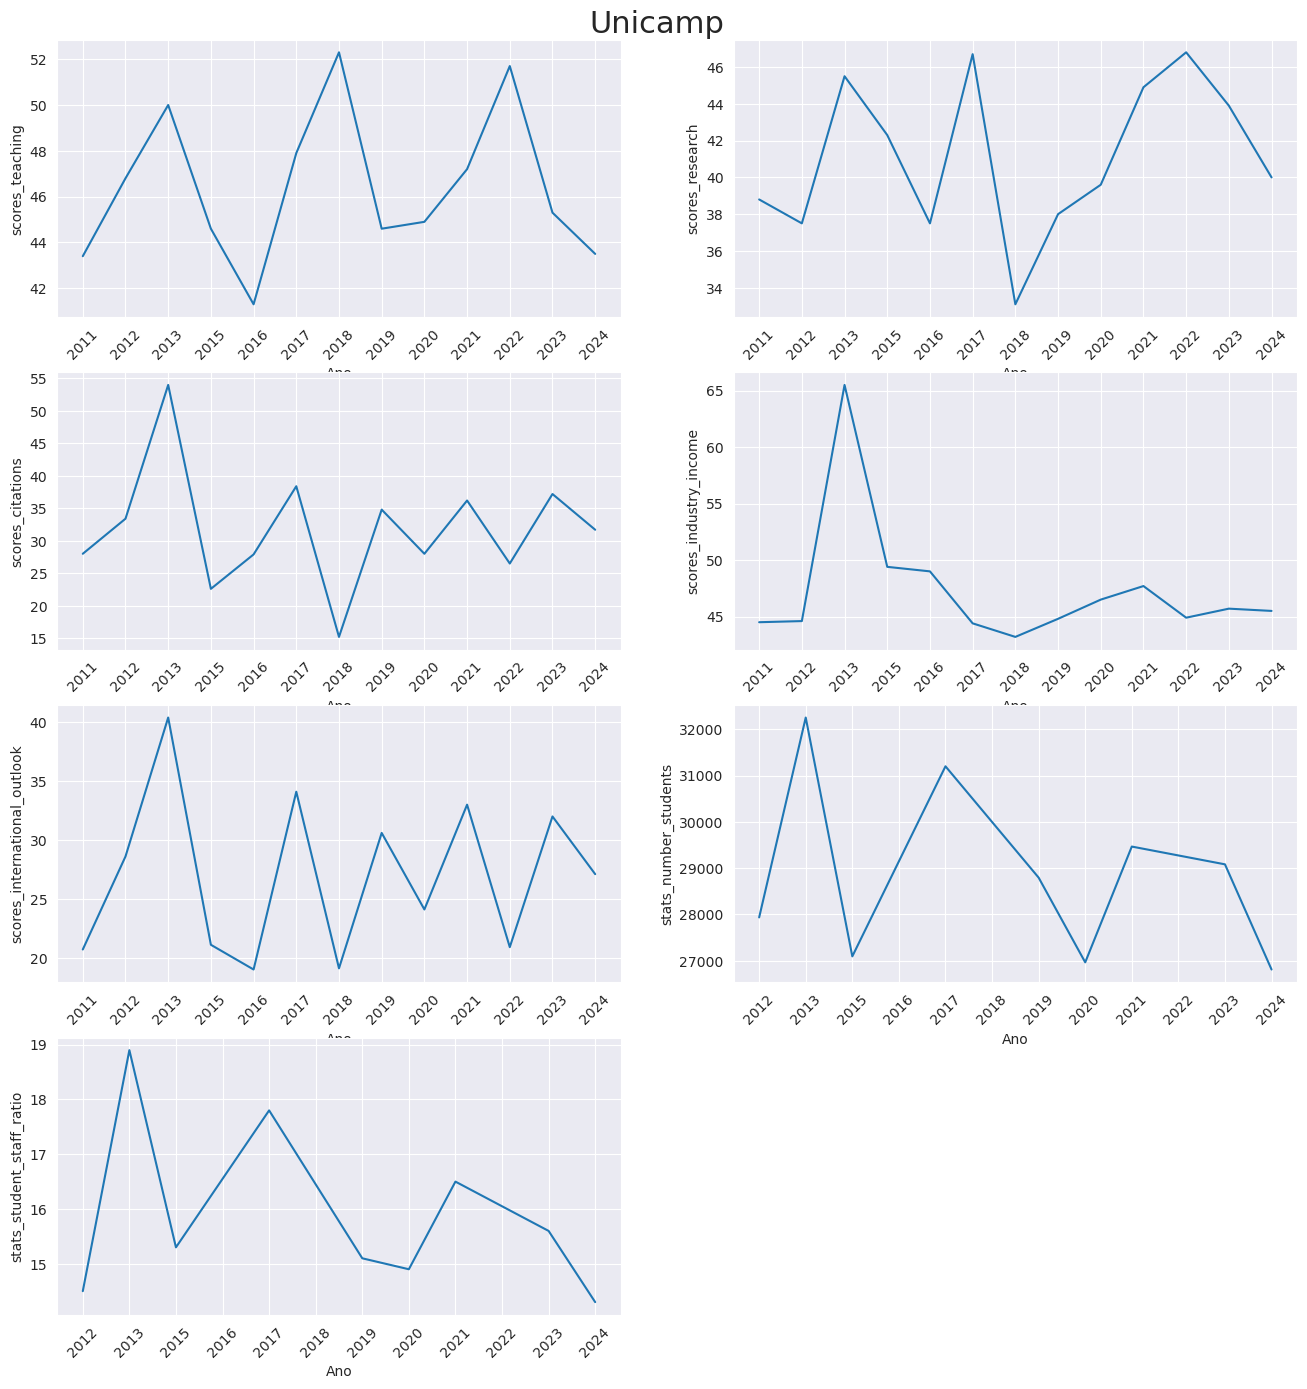

In [233]:
ncols=2
nrows=4
index_indicador=0
fig,axs=plt.subplots(ncols=ncols,sharex=False,nrows=nrows,figsize=(16,15))
fig.suptitle('Unicamp', fontsize=22) #adiciona um título geral para os subplots
plt.subplots_adjust(top=0.96) #controla a distância entre o título geral dos subplots e os primeiros gráficos

for row in range(nrows):
    for col in range(ncols):
        if row==3 and col==1:
            break
        sns.lineplot(data=unicamp,x='Ano',y=indicadores[index_indicador],ax=axs[row,col])
        axs[row,col].tick_params('x', labelrotation=45) 
        index_indicador+=1
fig.delaxes(axs[row][col])
#axs[3,0].tick_params('x', labelrotation=45) 


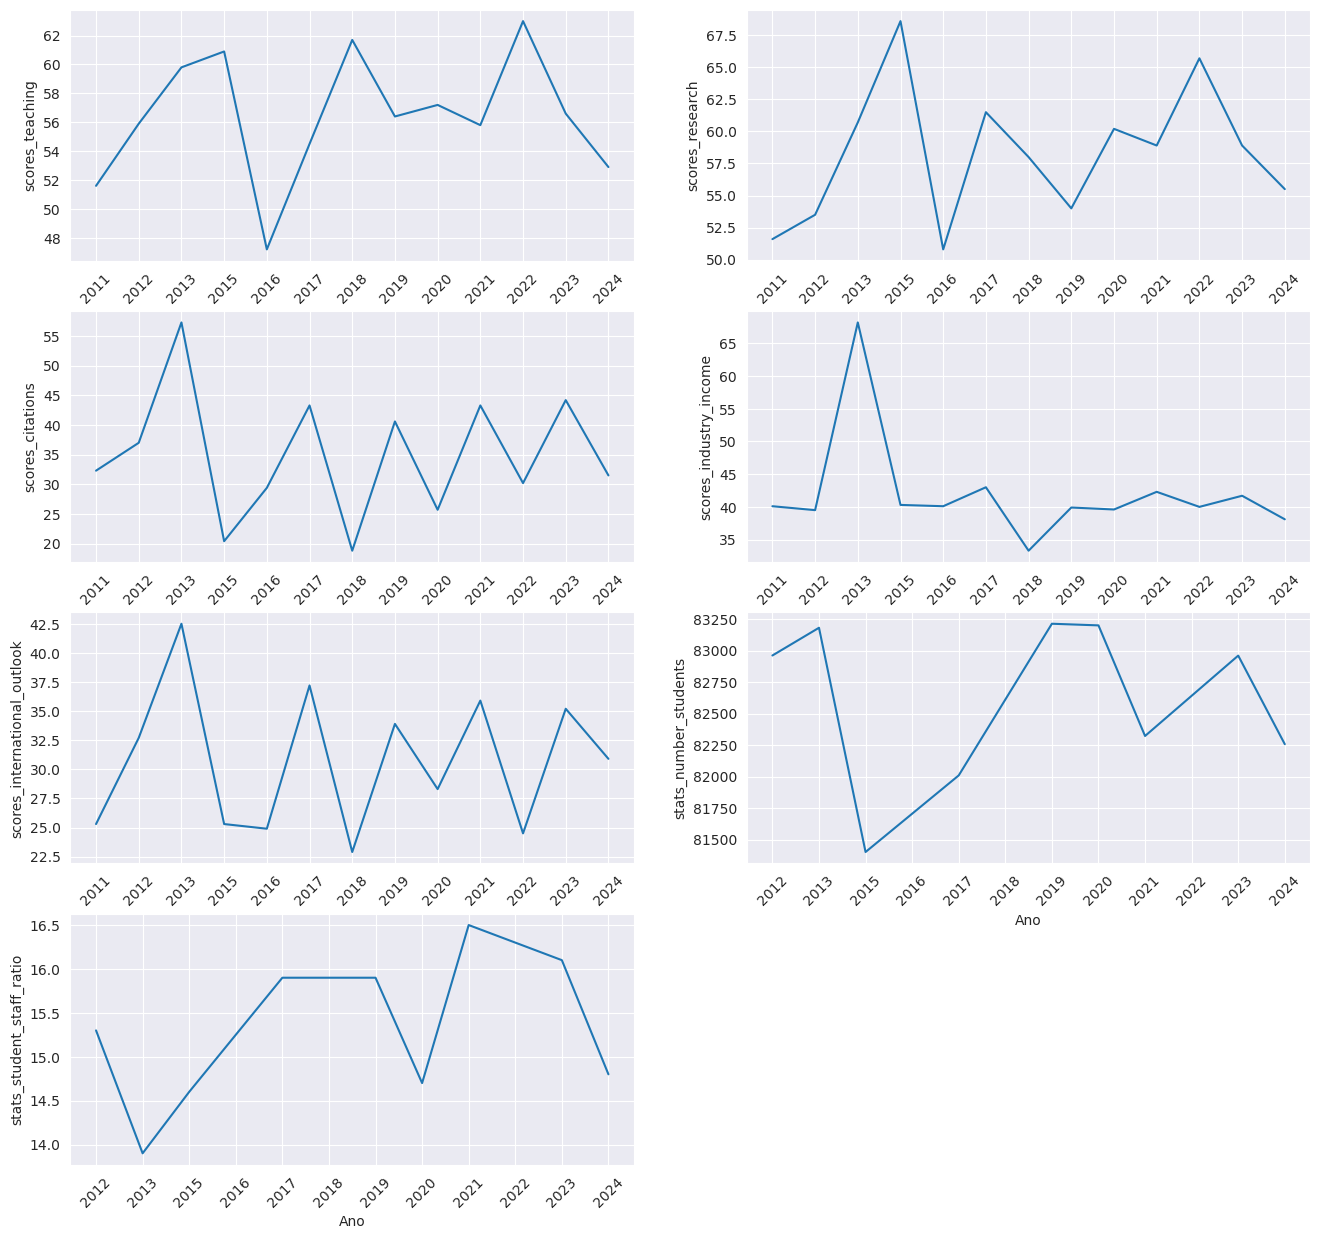

In [229]:
ncols=2
nrows=4
index_indicador=0
fig,axs=plt.subplots(ncols=ncols,sharex=False,nrows=nrows,figsize=(16,15))
for row in range(nrows):
    for col in range(ncols):
        if row==3 and col==1:
            break
        sns.lineplot(data=usp,x='Ano',y=indicadores[index_indicador],ax=axs[row,col])
        axs[row,col].tick_params('x', labelrotation=45) 
        index_indicador+=1
fig.delaxes(axs[row][col])
#axs[3,0].tick_params('x', labelrotation=45) 

In [ ]:
#Plotar graficos com as proporções das avaliações para cada destino
fig,axs=plt.subplots(8,2,figsize=(22,40))
plt.subplots_adjust(top=0.96) #controla a distância entre o título geral dos subplots e os primeiros gráficos
fig.suptitle('Proporção das avaliações com cada nota', fontsize=22) #adiciona um título geral para os subplots
row_subplot=0
col_subplot=0
for num_destino in range(len(proporcao_notas)):
    destino=proporcao_notas.index[num_destino]
    sns.set_theme(style='darkgrid')
    ax=sns.barplot(x=[1,2,3,4,5],y=proporcao_notas.iloc[num_destino,:5],ax=axs[row_subplot,col_subplot],color='steelblue')
    ax.text(-0.45, 0.95, destino)
    ax.text(-0.45, 0.85, "Número de avaliações: {}".format(proporcao_notas.loc[destino,'Total Avaliações']))
    ax.set(ylabel=None)
    ax.set_ylim(0,1)
    row_subplot+=1
    if row_subplot>7:
        row_subplot=0
        col_subplot=1
fig.delaxes(axs[7][1])
